<a href="https://colab.research.google.com/github/preetamjumech/DL_DNN_from_Scratch/blob/main/Preetam_Saha_28_09_2022_Classification_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

--2022-09-28 15:49:27--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘adult.data.2’

adult.data.2        100%[===================>]   3.79M  7.39MB/s    in 0.5s    

2022-09-28 15:49:28 (7.39 MB/s) - ‘adult.data.2’ saved [3974305/3974305]



In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [29]:
data = pd.read_csv("/content/adult.data",header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [31]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [32]:
data.shape

(32561, 15)

In [33]:
data.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

In [35]:
data[14].value_counts()

 <=50K    24720
 >50K      7841
Name: 14, dtype: int64

In [36]:
y = data[14]
y.shape

(32561,)

In [37]:
y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: 14, Length: 32561, dtype: object

In [38]:
y = y.map({" <=50K":0," >50K":1})
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: 14, Length: 32561, dtype: int64

In [39]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
cont=data.iloc[:,[0,2,4,10,11,12]]

In [42]:
cont=pd.DataFrame(StandardScaler().fit_transform(cont))

In [44]:
cat=data.iloc[:,[1,3,5,6,7,8,9,13]]

In [45]:
cat=pd.get_dummies(cat,drop_first=True)

In [46]:
x = pd.concat([cat,cont],axis=1)

In [47]:
x.shape

(32561, 100)

In [48]:
import torch

In [49]:
x = torch.tensor(x.values)

y = torch.tensor(y.values)

In [50]:
x.shape

torch.Size([32561, 100])

In [51]:
y.shape

torch.Size([32561])

In [52]:
import torch,torchsummary
import torch.nn as nn
import torch.nn.functional as F 
from torch.utils.data import DataLoader,TensorDataset 
from torch.optim import Adam,RMSprop

In [53]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3)

In [54]:
train_loader = DataLoader(TensorDataset(x_train.float(),y_train),
                                       batch_size=64,shuffle = True)

test_loader = DataLoader(TensorDataset(x_test.float(),y_test),
                                      batch_size = 64,shuffle = False)

In [55]:
class DNN_MNIST(nn.Module):
  def __init__(self):
    super(DNN_MNIST,self).__init__()

    self.h1 = nn.Linear(in_features=100, out_features = 512)
    self.h2 = nn.Linear(in_features=512, out_features = 256)
    self.h3 = nn.Linear(in_features=256, out_features = 128)
    self.h4 = nn.Linear(in_features=128, out_features = 64)
    self.out = nn.Linear(in_features=64, out_features = 2)
    self.bn1 = nn.BatchNorm1d(num_features=512)
    self.bn2 = nn.BatchNorm1d(num_features=256)
    self.bn3 = nn.BatchNorm1d(num_features=128)
    self.dropout = nn.Dropout(p=0.4)

  def forward(self,x):
    x = F.relu(self.h1(x))
    x = self.bn1(x)
    x = self.dropout(x)

    x = F.relu(self.h2(x))
    x = self.bn2(x)
    x = self.dropout(x)

    x = F.relu(self.h3(x))
    x = self.bn3(x)
    x = self.dropout(x)

    x = F.relu(self.h4(x))
    x = self.dropout(x)

    x = self.out(x)
    return x

In [56]:
dnn_model = DNN_MNIST()

In [ ]:
list(dnn_model.parameters())

In [58]:
opt = Adam(dnn_model.parameters(),lr=0.001)

In [59]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [60]:
dnn_model = dnn_model.to(device)

In [61]:
from tqdm import tqdm

In [69]:
def training(model, train_loader, opt):
    train_loss = 0.0
    model.train()
    for batch, target in tqdm(train_loader):
        batch = batch.float().to(device)
        target = target.to(device)
        #print(target.dtype)

        opt.zero_grad()
        output = model(batch.float())
        #print(output.dtype)

        loss = F.cross_entropy(output, target)
        loss.backward()
        opt.step()
        train_loss += loss.item()

    return train_loss

In [70]:
def validate(model, test_loader, opt):
    val_loss = 0.0
    model.eval()
    with torch.no_grad():
        for batch, target in tqdm(test_loader):
            batch = batch.float().to(device)
            target = target.to(device)

            output = model(batch.float())
            loss = F.cross_entropy(output, target)
            val_loss += loss.item()
    return val_loss

In [ ]:
model = dnn_model.to(device)
hist = {'train_loss':[], 'val_loss':[]}
for epoch in range(25):
    hist['train_loss'].append(training(model, train_loader,opt))
    hist['val_loss'].append(validate(model, test_loader,opt))

In [72]:
hist["train_loss"][-1] , hist["val_loss"][-1]

(99.49507105350494, 51.302283585071564)

In [73]:
final_pred_vals=model(x_test.float())

In [74]:
preds=np.argmax(final_pred_vals.detach().numpy(),axis=1)

In [75]:
preds

array([0, 0, 0, ..., 0, 0, 0])

0.8542327771522162

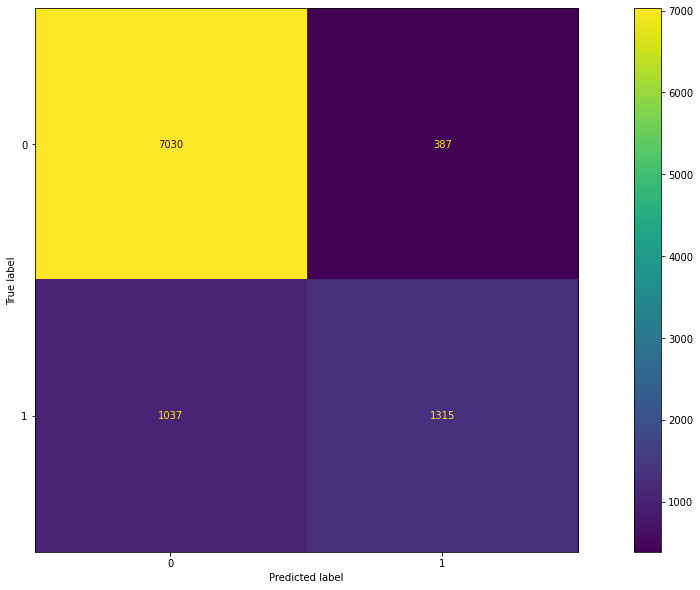

In [76]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score
cm=confusion_matrix(y_test,preds)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
accuracy_score(y_test,preds)